## 필수 라이브러리

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image # 이미지 주소로 불러오는 

In [34]:
# 매직 명령어
%matplotlib inline
%config InlinedBackend.figure_format = 'retina'

mpl.rc('font', family='batang')
mpl.rc('axes', unicode_minus=False)

sns.set_style('dark') # 노트
sns.set(color_codes=True)
plt.rc('figure', figsize=(10,8))

warnings.filterwarnings('ignore')

## 데이터 로딩과 데이터 탐색

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [11]:
diabetes = pd.read_csv('C:/k_digital/Sourcce/data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# 최종적으로 예측해날 결과값은?
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 결측값이 없고, 모두 숫자형으로 되어있다.

In [16]:
# 수치들의 분포 확인
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 최소값에 0이 많은데, 특히 포도당부하 수치의 경우 0값이 나올 수 없으니 분포를 살펴보다.

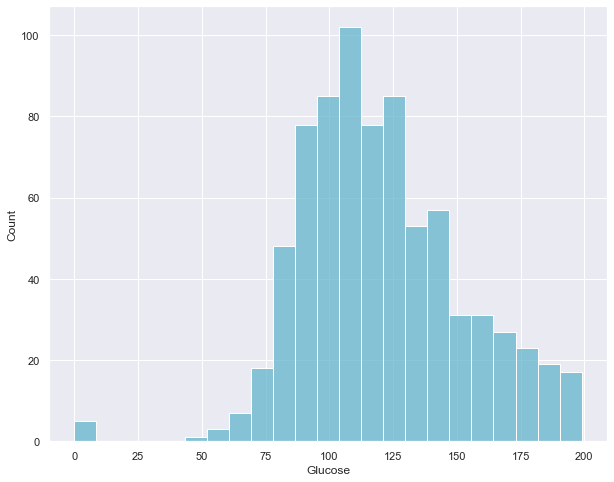

In [17]:
sns.histplot(data=diabetes, x='Glucose', kde=False, color='c')
plt.show()

In [23]:
# 0값인 글루코스의 수 카운트
diabetes['Glucose'].value_counts()[0]

5

In [25]:
# 0값을 가진 다른 변수들은?
# 검사가 필요한 컬럼명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
## 전에 청경채 자료 부르고 싶었을떄 이렇게 리스트화 하면 되겠넹

# 전체 데이터 건수
total_count = diabetes.count()[0] # 한가지 값만 가져오려구

# 각 feature별 0값이 차지하는 비율분석
for feature in zero_features:
    zero_count = diabetes[feature].value_counts()[0]
    zero_rate = zero_count / total_count * 100
    print(f"{feature}의 0 건수: {zero_count}, 퍼센트: {zero_rate:.2f}%")

Glucose의 0 건수: 5, 퍼센트: 0.65%
BloodPressure의 0 건수: 35, 퍼센트: 4.56%
SkinThickness의 0 건수: 227, 퍼센트: 29.56%
Insulin의 0 건수: 374, 퍼센트: 48.70%
BMI의 0 건수: 11, 퍼센트: 1.43%


- 무시할 수 없는 비율의 0값을 가진 컬럼도 있음.
- 피처 특성상 0값은 아닐것 같은데 결측값을 0으로 대체한건 아닐까?
- 그럼 0값을 평균값으로 대체함

In [26]:
# 0 값을 평균값으로 대체
## 0값이 있는 컬럼의 평균
mean_zero_features = diabetes[zero_features].mean()
## 0값을 각 컬럼의 평균값으로 대체
diabetes[zero_features] = diabetes[zero_features].replace(0, mean_zero_features)

In [59]:
# 한글 지원
mpl.rcParams['font.family'] = 'batang'

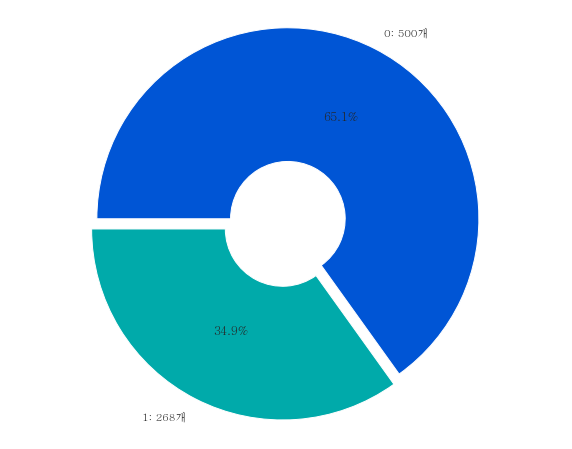

In [60]:
frequency = diabetes['Outcome'].value_counts()
label=[f"0: {frequency[0]}개", f"1: {frequency[1]}개"]

plt.pie(frequency,
       startangle=180, counterclock =False, explode=[0.03]*2, autopct = '%1.1f%%',
       labels=label, colors=sns.color_palette('winter',2), wedgeprops=dict(width=0.7))

plt.axis('equal')
plt.show()
#  nagative의 개수가 5백개이니깐, 정확도보다는 재현율?

## 로지스틱 회귀 모델 구현

In [36]:
X =diabetes.iloc[:,:-1] # 모든 행을 가져오는데 마지막 열만 빼고
y =diabetes.Outcome

# 표준화
scaler = StandardScaler() # instance
scaler.fit(X) 
X_scaled = scaler.transform(X)

In [39]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
min_max = MinMaxScaler()
min_max.fit(X)
X_mm = min_max.transform(X)
## 두개 차이를 보려구

### 학습/검증 데이터 분리_StandardScaler
- 클래스별 비율에 맞게 분리, stratify옵션

In [40]:
# 세트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y , random_state=156, test_size=0.2, stratify = y) 

### Logistic Regression

In [43]:
# 평가 수행하는 함수 정의
def get_clf_eval(yTest, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(yTest, pred)
    accuracy = accuracy_score(yTest, pred)
    precision = precision_score(yTest, pred)
    recall = recall_score(yTest, pred)
    f1 = f1_score(yTest, pred)
    auc = roc_auc_score(yTest, pred_proba_po)
    
    print('오차행렬 : {}'.format(confusion))
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [42]:
# modelling
lr = LogisticRegression()
#fitting
lr.fit(X_train, y_train) # 정규화
# predicting
pred= lr.predict(X_test)
pred_proba_po = lr.predict_proba(X_test)[:,1].reshape(-1,1) 
# 확률값으로 1에해당하는 값만 가져와서 차원을 다시 잡음

cm =confusion_matrix(y_test, pred)
cm # 혼돈행렬

array([[90, 10],
       [21, 33]], dtype=int64)

In [44]:
get_clf_eval(y_test, pred, pred_proba_po)

오차행렬 : [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


#### MinMaxScaler 이용시

In [41]:
# 정규화 꺼
train_input, test_input, train_target, test_target = train_test_split(
 X_scaled, y , random_state=156, test_size=0.2, stratify = y)

In [46]:
 # 표준화의 모델링~예측
lrs =LogisticRegression()
lrs.fit(train_input, train_target)
preds= lrs.predict(test_input)
preds_proba_po = lrs.predict_proba(test_input)[:,1].reshape(-1,1)

cms = confusion_matrix(test_target, preds)
get_clf_eval(test_target, preds, preds_proba_po)

오차행렬 : [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


- 재현율이 61퍼라는 건 네거티브가 출력될 확률이 높다는 거니깐 임계값(경계선)을 조절하여 네거티브 출력확률을 낮춰야겠군 
- 재현율이 높지 않으니 각각이 어떻게 분포 되어있는지 확인하고 조정하는 방안을 모색해보자

#### 혼돈행렬(Confision Matrix, 오차행렬)
- TN: True_Negative, negative값 0으로 예측했고, 실제값도 negative0의 경우의수
- FP: False_Positive, positive1로 예측, 실제값은 negative 0으로 나온 경우의 수
- FN: False_Negative, negative값을 0으로 예측했고, 실제는 positive 1로 나온 경우의수
- TP: True_Positive, positive 1로 예측했고, 실제값도 positive값 1로 나온 경우의 수
<br><br>
1. 정확도 : 전체 데이터개수 대비 정답을 맞춘 데이터수
 > <span style= 'color:cyan' >Accuracy = (TN + TP) / (TN + FP +FN + TP)</span>
<br>
2. 정밀도와 민감도(재현율) : 비슷하지만 조금 다른 지표로, <span style= 'color:cyan' >**불균이한 데이터셋**</span>을 다룰 때 유용한 지표
 - 불균일한 데이터셋이란 데이터의 1과 0의 비율이 7:3 또는 3:7이상 차이가 나는 상태
 - 정밀도(precision) : 모델이 1이라고 예측했을 떄 얼마나 잘 맞는 지의 비율
 > <span style= 'color:cyan' >TP / (FP + TP)</span>
 - 민감도(recall) : 실제 1인 값을 모델이 얼마나 1로 잘 예측했는지에 대한 비율
 > <span style= 'color:cyan' >TP / (FN + TP)</span>
3. F1 score : 정밀도와 민감도를 통합한 지표로 정밀도와 민감도의 조화평균 값
 - 만든 모델이 얼마나 성능이 좋은지를 확인할 때 사용하는 지표
 - 한 개의 지표를 정리할 필요가 있을 떄 적합한 지표(정밀도와 재현율중 하나를 정리하여야할 때)
 > <span style= 'color:cyan' >2 * (precision * recall) / (precision + recall)</span>
<br><br>
- 이진분류 문제 중 암에 걸렸는지를 찾는 문제에서 진단이 암일 경우(1), 아닐 경우(0)을 의미
- 생존 여부를 판단하는 문제에서 생존인 경우(1), 아닐경우(0)
> 즉, 우리가 알아내고자 하는 값을 1로

### 정밀도/재현율 시각화

In [53]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--',
             label = 'precision', color='dodgerblue')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall',
            color='hotpink')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [48]:
# 임계값(threshold)별로 정밀도, 재현율 출력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_po)

(array([0.43548387, 0.43089431, 0.43442623, 0.43801653, 0.44166667,
        0.44537815, 0.44915254, 0.45299145, 0.45689655, 0.46086957,
        0.46491228, 0.46902655, 0.47321429, 0.47747748, 0.48181818,
        0.48623853, 0.49074074, 0.48598131, 0.48113208, 0.48571429,
        0.49038462, 0.49514563, 0.49019608, 0.4950495 , 0.5       ,
        0.50505051, 0.51020408, 0.51546392, 0.52083333, 0.52631579,
        0.53191489, 0.53763441, 0.5326087 , 0.53846154, 0.53333333,
        0.52808989, 0.52272727, 0.52873563, 0.53488372, 0.52941176,
        0.53571429, 0.54216867, 0.53658537, 0.54320988, 0.55      ,
        0.55696203, 0.55128205, 0.55844156, 0.56578947, 0.57333333,
        0.58108108, 0.5890411 , 0.59722222, 0.6056338 , 0.6       ,
        0.60869565, 0.60294118, 0.59701493, 0.60606061, 0.6       ,
        0.609375  , 0.61904762, 0.61290323, 0.62295082, 0.63333333,
        0.6440678 , 0.63793103, 0.64912281, 0.66071429, 0.67272727,
        0.66666667, 0.67924528, 0.69230769, 0.70

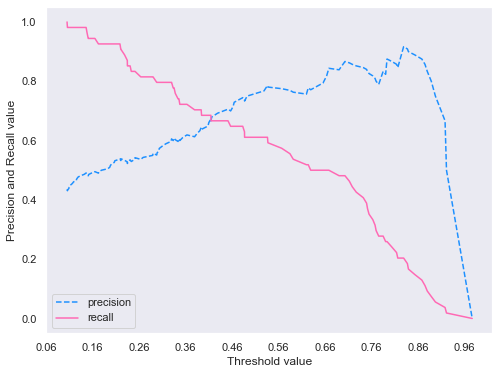

In [54]:
precision_recall_curve_plot(y_test, pred_proba_po)

- 정밀도와 재현율의 균형이 맞아야하는데, 겹쳐있을때 균형이 맞다고 볼 수 있다.
- 여기서 균형이 맞는 부분이 0.44정도인데 그렇다치면 재현율이 0.6정도로 값이 높지않다.
- 즉, 두 지표 모두 그렇게 값이 높지않다 판단됨. <u>트레이오프이니 정밀도를 버리고 재현율을 올리자</u>

- 1을(양성) 더 많이 찾아 내는것이 중요한데 현재 데이터에 0이(500)1이(200대)정도로 편차가 보임
- 그래서 정밀도와 재현율의 임계값을 보는 시각화 그래프를 통해 확인해본거

In [61]:
from sklearn.preprocessing import Binarizer
def get_clf_eval_thres(y_test, pred_po, threshold, f1_show=False, auc_show=False):
    eval_df = pd.DataFrame()
    
    for thres in threshold:
        # threshold에 따른 예측 분류 값
        binarizer = Binarizer(threshold = thres)
        binarizer.fit(pred_po)
        thres_pred = binarizer.transform(pred_po)
        
        # 평가지표  
        accuracy = accuracy_score(y_test, thres_pred)
        precision = precision_score(y_test, thres_pred)
        recall = recall_score(y_test, thres_pred)
        f1 = f1_score(y_test, thres_pred)
        auc = roc_auc_score(y_test, pred_po)
        
        # 데이터 프레임 형태
        eval_lst = np.array([accuracy, precision, recall, f1, auc]).reshape(-1,1)
        temp = pd.DataFrame(eval_lst, columns=[thres], 
                            index = ["정확도", "정밀도", "재현율", "F1스코어", "AUC"])
        eval_df = pd.concat([eval_df,temp], axis=1)
        
    eval_df.columns.names = ["임계값"]
    
    if f1_show == False:
        eval_df.drop("F1스코어", axis=0, inplace=True)
        
    if auc_show == False:
        eval_df.drop("AUC", axis=0, inplace=True)
        
    return round(eval_df, 4)

In [62]:
# threshold 리스트
thres_list = [0.3,0.33,0.39,0.42,0.45,0.48,0.5]
get_clf_eval_thres(y_test, pred_proba_po, thres_list, f1_show=True, auc_show=True)

임계값,0.30,0.33,0.39,0.42,0.45,0.48,0.50
정확도,0.7143,0.7403,0.7532,0.7792,0.7857,0.7987,0.7987
정밀도,0.5658,0.6000,0.6333,0.6923,0.7059,0.7447,0.7674
재현율,0.7963,0.7778,0.7037,0.6667,0.6667,0.6481,0.6111
F1스코어,0.6615,0.6774,0.6667,0.6792,0.6857,0.6931,0.6804
AUC,0.8433,0.8433,0.8433,0.8433,0.8433,0.8433,0.8433


- 처음 예측값, 정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433
- 재현율에 초점을 둔다면 0.30이 좋지만 정밀도가 너무 떨어져서 <u>여러가지를 고려하여 0.48 값</u>

In [63]:
binarizer = Binarizer(threshold=0.48)
pred048 = binarizer.fit_transform(pred_proba_po)

get_clf_eval(y_test, pred048, pred_proba_po)

오차행렬 : [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
